# K-means clustering

## import library

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [278]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]


number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

#print('number of data : {}'.format(number_data))
#print('number of feature : {}'.format(number_feature))

## plot the input data

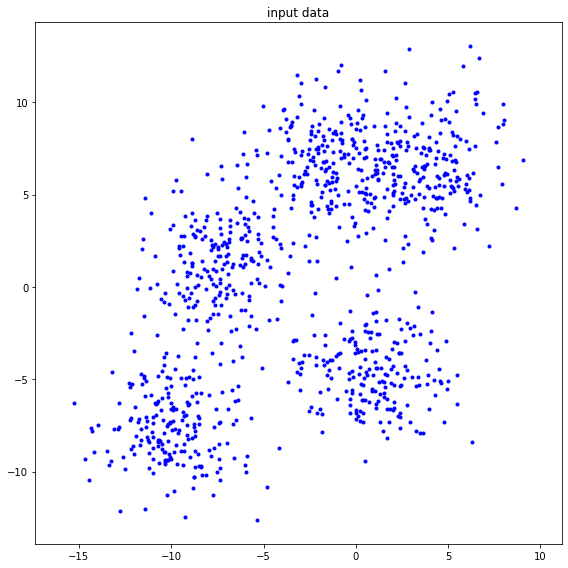

In [279]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x,y, c="b", marker=".")

plt.axis('equal')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [280]:
def compute_distance(feature, center):
    
    temp = center
    
    for i in range(np.size(feature, 0)-1):
        temp = np.vstack([temp,center])
        
    feature = feature - center
    feature = feature**2
    distance = feature.sum(axis=1)
    #distance = np.sqrt(distance)
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [281]:
def compute_centroid(feature, label_feature, value_label):
    
    count = 0
    centroid = np.zeros((1, np.size(feature, 1)))
    
    for i in range(np.size(feature,0)):
        
        if (label_feature[i] == value_label):
            centroid = feature[i] + centroid
            count = count + 1
    
    
    if (count!=0):
        centroid = centroid/count
        
    return centroid

In [282]:
def compute_loss(distance, label_feature):
    
    loss = 0
    
    for i in range(number_data):
        num = int(label_feature[i])
        loss = loss + distance[i][num]
    
    loss = loss/number_data
    
    return loss

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [283]:
def compute_label(distance):
    label_feature = np.argmin(distance, axis = 1)
    return label_feature

In [294]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 1000
# ===================================================

In [296]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

label_cluster = np.zeros(shape=(number_data, number_cluster))
label_feature = np.random.randint(number_cluster, size = number_data)

for i in range(number_iteration):

    for k in range(number_cluster):
        
        centroid[k] = compute_centroid(feature, label_feature, k)
        distance[:,k] = compute_distance(feature, centroid[k])
        if(centroid[k][0] == 0 and centroid[k][1]):
            centroid[k] = centroid_iteration[i-1][k]
        
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    loss_iteration[i] = compute_loss(distance,label_feature)

    #print(loss_iteration[i])
    
label = compute_label(distance)
for i in range(number_data):
    for j in range(number_cluster):
        if(label[i]==j):
            label_cluster[i][j] = 1

## plot the results

In [297]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    # ===================================================
    # fill up the blank
    plt.scatter(feature[:,0],feature[:,1], c="b", marker=".")
    plt.axis('equal')
    plt.tight_layout()
    # ===================================================
    
    plt.tight_layout()
    plt.show()

In [298]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    plt.plot(loss_iteration, color = 'red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    # ===================================================
    plt.tight_layout()
    plt.show()

In [299]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    # ===================================================
    color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for i in range(number_cluster):
        i_str = str(i)
        if(i<number_cluster-1):
            plt.scatter(centroid_iteration[0,i,0],centroid_iteration[0,i,1], c="b",marker = "o")
            plt.scatter(centroid_iteration[-1,i,0],centroid_iteration[-1,i,1], c="r",marker = "s")
        plt.plot(centroid_iteration[:,i,0],centroid_iteration[:,i,1], color = color_list[i],label='cluster = '+ i_str)

    plt.scatter(centroid_iteration[0,number_cluster-1,0],centroid_iteration[0,number_cluster-1,1], c="b",marker = "o",label='initial')
    plt.scatter(centroid_iteration[-1,number_cluster-1,0],centroid_iteration[-1,number_cluster-1,1], c="r",marker = "s",label='final')
    
    plt.xlabel('iteration')
    plt.legend(loc='upper right')
    # ===================================================
    plt.tight_layout()
    plt.show()

In [300]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    color_num = label_cluster.shape[1]
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x,y,c=label_feature,cmap=plt.cm.get_cmap('rainbow',color_num),s=20)
    plt.colorbar(ticks=range(color_num),label='cluster')
    
    # ===================================================
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

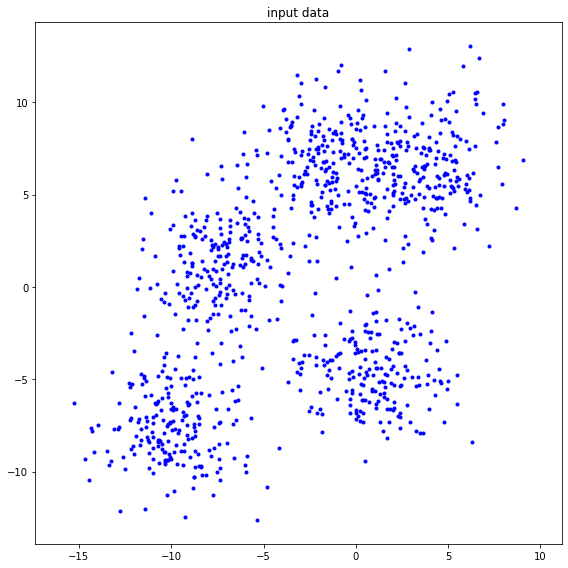

In [290]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

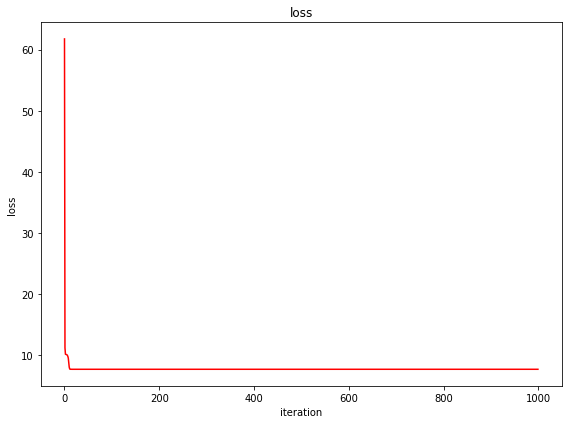

In [291]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

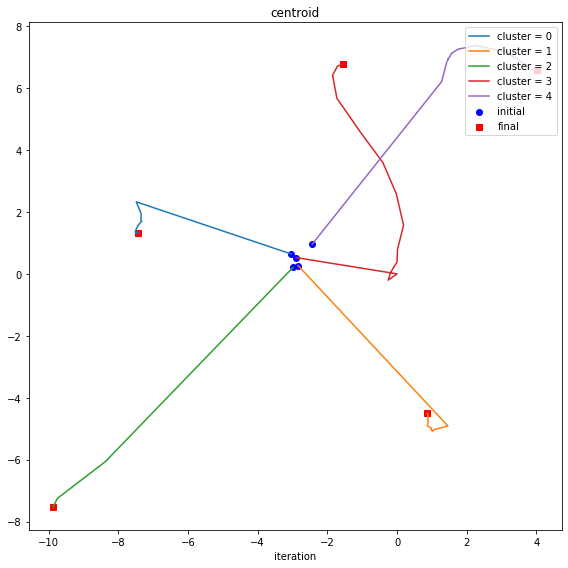

In [292]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

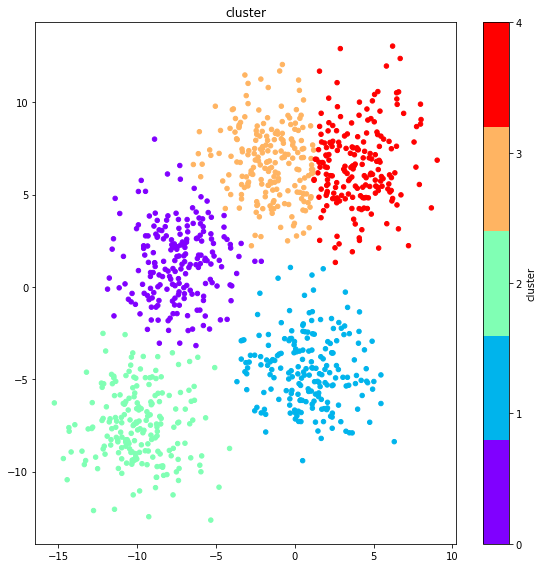

In [293]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

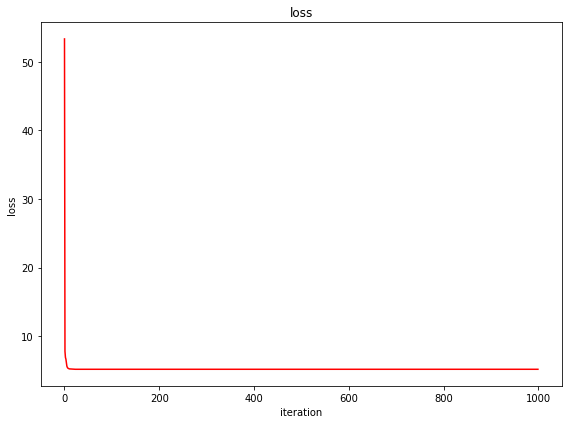

In [301]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

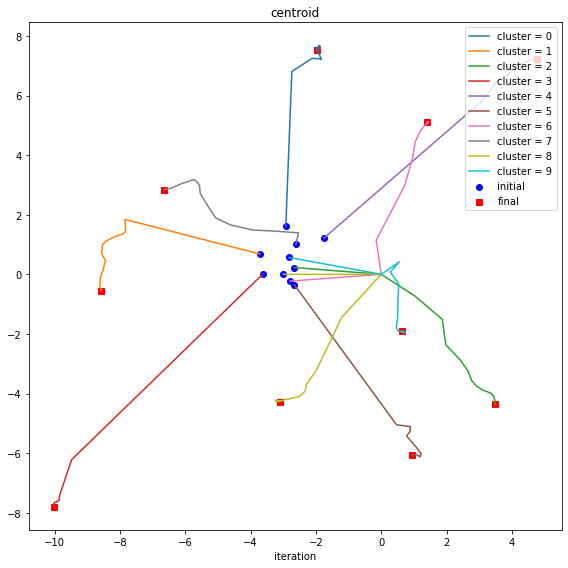

In [302]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

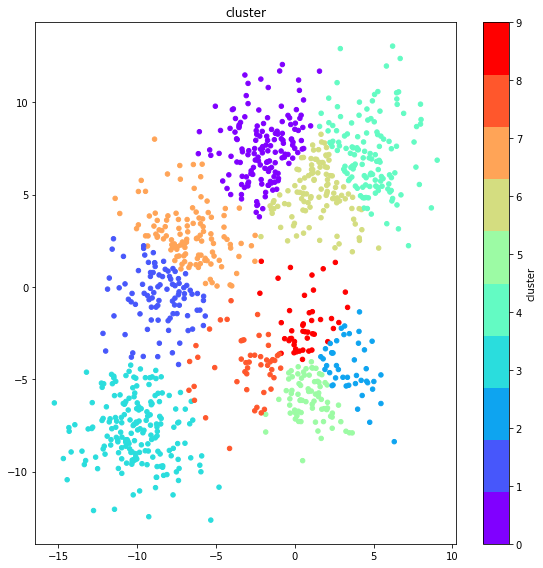

In [303]:
plot_cluster(feature, label_feature, label_cluster)

***